# Exploratory Data Analysis

This processed data is not uploaded to the Github repo, as some of the files are too large. Run notebook 2 in order to produce the same files.

In [3]:
import pandas as pd

In [4]:
X_train = pd.read_feather('../data/processed/X_train_preprocessed.feather')
y_train = pd.read_feather('../data/processed/y_train.feather')
data = pd.concat([X_train, y_train], axis=1)
data

,review,voted_up
0,apparently fault whenever dont save teammate t...,True
1,get level 20farm potsget 88 die 1 shock denial...,True
2,played game almost 1000 hour seen go good exce...,False
3,play havent heard high elvesif play,True
4,personally found game frustrating thing loved ...,False
...,...,...
58471,first game kind ever ever enjoyed something al...,True
58472,overall decent game early accesspro great buil...,True
58473,want great sniper moment realism game purchase...,True
58474,game warhammer reskin new racesunits marked im...,True


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58476 entries, 0 to 58475
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   review    58476 non-null  object
 1   voted_up  58476 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 514.1+ KB


## Total Vocabulary

The dataset has over 200,000 tokens, and this is even before bigrams are factored in. I can't run a model on this many tokens, and few of them will be of any relative importance anyways, so only some of the most popular will be used in the final model.

In [6]:
total_vocabulary = []
for review in data['review'].tolist():
    total_vocabulary += review.split()

In [7]:
print('There are {} unique tokens in the dataset.'.format(len(set(total_vocabulary))))

There are 223823 unique tokens in the dataset.


## Frequency Distributuion

Many of the most common words are used in both classes. Words like "game" and "play" make sense, but even "like" has similar representation across the two classes. In order to get a truly good representation of the differences between the positive and negative reviews, I would need to remove words that have a certain level of representation in both classes. As well, including bigrams may yield intresting results here.

In [8]:
import matplotlib.pyplot as plt
from nltk import FreqDist
plt.style.use('seaborn')
plt.style.use('seaborn-talk')

In [9]:
data['voted_up'].value_counts(normalize=True)

True     0.805903
False    0.194097
Name: voted_up, dtype: float64

In [10]:
reviews_pos = data[data['voted_up']]['review']
reviews_neg = data[~data['voted_up']]['review']

In [11]:
vocab_pos = []
for review in reviews_pos.tolist():
    vocab_pos += review.split()

vocab_neg = []
for review in reviews_neg.tolist():
    vocab_neg += review.split()

In [12]:
freqdist_pos = FreqDist(vocab_pos)
top_20_pos = freqdist_pos.most_common(20)

freqdist_neg = FreqDist(vocab_neg)
top_20_neg = freqdist_neg.most_common(20)

In [13]:
words_pos, values_pos = list(zip(*top_20_pos))
values_pos_norm = tuple(v/len(reviews_pos) for v in values_pos)

words_neg, values_neg = list(zip(*top_20_neg))
values_neg_norm = tuple(v/len(reviews_neg) for v in values_neg)

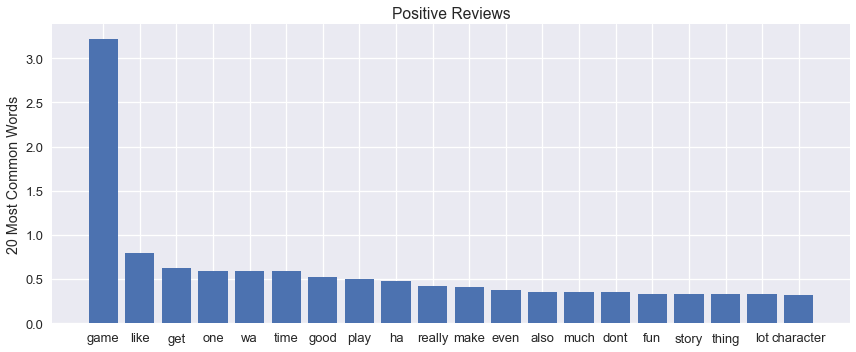

In [14]:
fig = plt.figure(figsize=(12, 5))
plt.bar(words_pos, values_pos_norm, figure=fig)
plt.ylabel('Average Occurances per Review')
plt.ylabel('20 Most Common Words')
plt.title('Positive Reviews')

plt.tight_layout()
plt.savefig('../visualizations/frequency-distribution-positive.png')
plt.show()

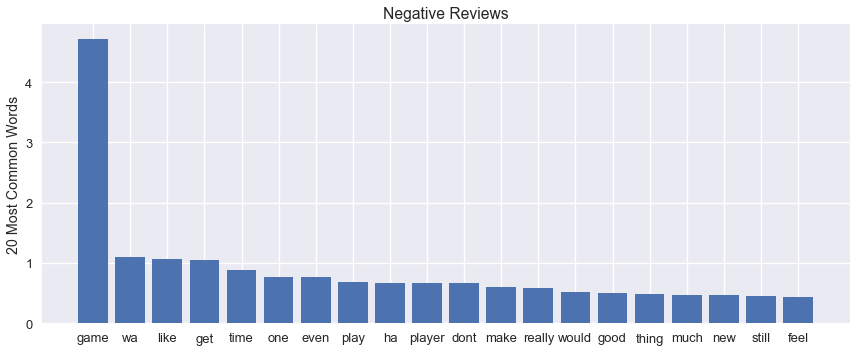

In [22]:
fig = plt.figure(figsize=(12, 5))
plt.bar(words_neg, values_neg_norm, figure=fig)
plt.ylabel('Average Occurances per Review')
plt.ylabel('20 Most Common Words')
plt.title('Negative Reviews')

plt.tight_layout()
plt.savefig('../visualizations/frequency-distribution-negative.png')
plt.show()

## Word Clouds

These results are more or less the same as the frequency distribution results. A lot more work needs to be done here.

In [19]:
from wordcloud import WordCloud

In [18]:
positive_dict = dict(zip(words_pos, values_pos))
negative_dict = dict(zip(words_neg, values_neg))

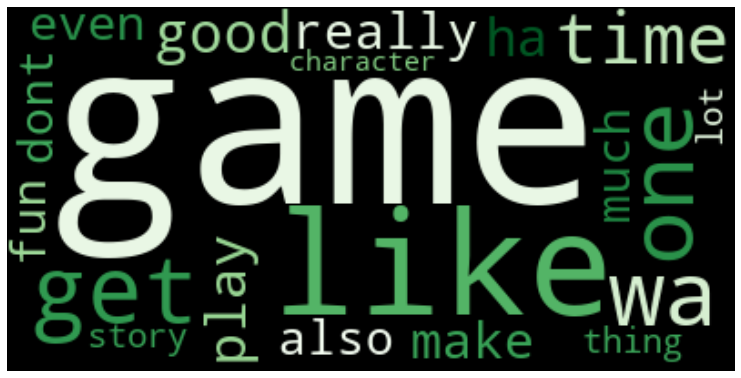

In [32]:
wordcloud = WordCloud(colormap='Greens').generate_from_frequencies(positive_dict)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.savefig('../visualizations/wordcloud-positive.png')
plt.show()

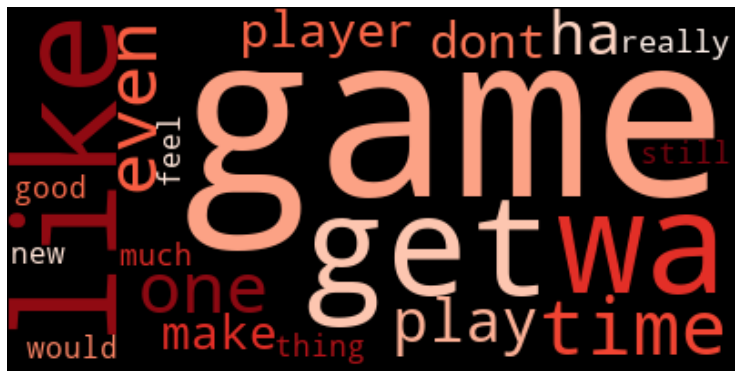

In [34]:
wordcloud = WordCloud(colormap='Reds').generate_from_frequencies(negative_dict)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.savefig('../visualizations/wordcloud-negative.png')
plt.show()

Overall I am disappointed with this EDA. Most of these results are less than helpful, and work needs to be done in order to get real results. I ran out of time with this project, but I'd like to come back to this and get it working better.